In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:

# Load Data
df = pd.read_csv("D:/projects/classic learn/employee_performance_app/data/hr_dashboard_data.csv")


In [6]:
# Convert 'Joining Date' to datetime format
df['Joining Date'] = pd.to_datetime(df['Joining Date'], errors='coerce')

In [8]:
# Selecting relevant features for prediction
features = ['Productivity (%)', 'Satisfaction Rate (%)', 'Salary', 'Projects Completed', 'Age']
target = 'Feedback Score'  # Define based on domain knowledge (could be Feedback Score)


In [9]:
df.dropna(inplace=True)  # Drop missing values


In [10]:
# Splitting Data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("Training features:", X_train.columns)


Training features: Index(['Productivity (%)', 'Satisfaction Rate (%)', 'Salary',
       'Projects Completed', 'Age'],
      dtype='object')


In [12]:

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [13]:

# Predictions
y_pred = model.predict(X_test)


In [14]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R-Squared Score: {r2}")


Mean Absolute Error: 1.7449999999999992
R-Squared Score: nan


d:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [16]:
# Save Model
with open("../models/performance_model.pkl", "wb") as f:
    pickle.dump(model, f)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14612\2256197284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Department'], y=df['Productivity (%)'], ax=axes[0], palette="Blues")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14612\2256197284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Department'], y=df['Satisfaction Rate (%)'], ax=axes[1], palette="Greens")


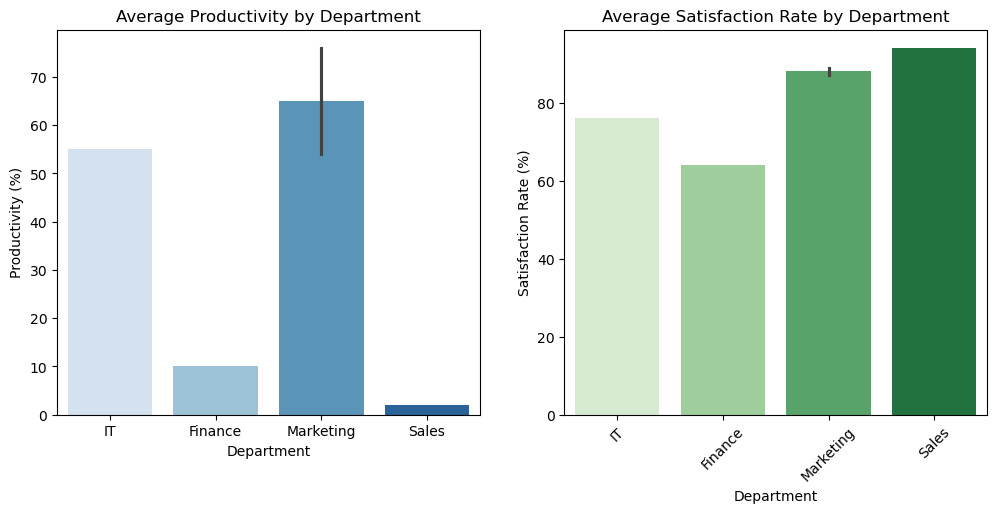

In [17]:
# Visualization: Department-wise Productivity & Satisfaction
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=df['Department'], y=df['Productivity (%)'], ax=axes[0], palette="Blues")
axes[0].set_title("Average Productivity by Department")
sns.barplot(x=df['Department'], y=df['Satisfaction Rate (%)'], ax=axes[1], palette="Greens")
axes[1].set_title("Average Satisfaction Rate by Department")
plt.xticks(rotation=45)
plt.show()


In [19]:
print(" Model Trained & Saved Successfully!")

 Model Trained & Saved Successfully!
